In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
# for word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#for bubble graphs
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math



In [4]:
#rea din csv
ufo_data = pd.read_csv("Master_sheet_ufo_data.csv")
ufo_data.head()

,Unnamed: 0,datetime,city,state,shape,duration (seconds),comments,date posted,latitude,longitude,Month,Day,Time,Year,Unique_ID
0,0,10/10/1993 22:00,peoria,il,light,8.0,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,1
1,1,10/10/1993 23:00,carthage,tn,other,60.0,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993,2
2,2,10/10/1994 18:30,burnt hills,ny,rectangle,120.0,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994,3
3,3,10/10/1994 22:00,pinebergen,ar,light,5.0,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994,4
4,4,10/10/1996 03:20,higginsville,mo,triangle,3.0,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996,5


In [7]:
#US only
ufo_usa=ufo_data
ufo_usa.head()
ufo_usa.tail()

,Unnamed: 0,datetime,city,state,shape,duration (seconds),comments,date posted,latitude,longitude,Month,Day,Time,Year,Unique_ID
58300,58300,12/1/20 17:50,Birmingham,AL,Light,10.0,Bright light moving sporadically up and down a...,12/23/20,33.518589,-86.810357,12,1,:50,20 1,58301
58301,58301,12/1/20 17:50,Birmingham,AL,Light,10.0,Bright light moving sporadically up and down a...,12/23/20,33.518589,-86.810357,12,1,:50,20 1,58302
58302,58302,12/1/20 14:45,Weidman,MI,Light,240.0,Extremely bright mirror like light that left v...,12/23/20,43.687528,-84.968913,12,1,:45,20 1,58303
58303,58303,12/1/20 09:00,Barnegat Township,NJ,Unknown,1800.0,Witnessed object being chased by fighter jets ...,12/23/20,39.764922,-74.269330,12,1,:00,20 0,58304
58304,58304,12/1/20 06:00,Hyde Park,VT,Diamond,30.0,I saw a very bright light in the sky and then ...,12/23/20,44.592528,-72.614841,12,1,:00,20 0,58305


In [8]:
#broken out by datetime 
ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

,Unnamed: 0,datetime,city,state,shape,duration (seconds),comments,date posted,latitude,longitude,Month,Day,Time,Year,Unique_ID
0,0,10/10/1993 22:00,peoria,il,light,8.0,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,1
1,1,10/10/1993 23:00,carthage,tn,other,60.0,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993,2
2,2,10/10/1994 18:30,burnt hills,ny,rectangle,120.0,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994,3
3,3,10/10/1994 22:00,pinebergen,ar,light,5.0,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994,4
4,4,10/10/1996 03:20,higginsville,mo,triangle,3.0,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996,5


In [9]:
#drop na

ufo_usa_clean = ufo_usa.dropna()
ufo_usa_clean.head()

,Unnamed: 0,datetime,city,state,shape,duration (seconds),comments,date posted,latitude,longitude,Month,Day,Time,Year,Unique_ID
0,0,10/10/1993 22:00,peoria,il,light,8.0,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,1
1,1,10/10/1993 23:00,carthage,tn,other,60.0,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993,2
2,2,10/10/1994 18:30,burnt hills,ny,rectangle,120.0,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994,3
3,3,10/10/1994 22:00,pinebergen,ar,light,5.0,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994,4
4,4,10/10/1996 03:20,higginsville,mo,triangle,3.0,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996,5


# Shapes

In [10]:
# frequncy of shape

ufo_usa_clean ['shape'].value_counts()

light        12835
triangle      6027
circle        5637
fireball      4996
unknown       4204
other         4027
sphere        3975
disk          2963
oval          2666
formation     1891
changing      1513
cigar         1351
flash         1035
rectangle      945
cylinder       928
diamond        863
chevron        744
teardrop       571
egg            528
cone           234
cross          180
Light           51
Triangle        15
Circle          14
Formation       14
Sphere          13
Other           10
Unknown          8
Rectangle        7
Fireball         7
Disk             6
delta            5
Flash            4
Oval             4
Cigar            3
Diamond          2
Changing         2
round            2
pyramid          1
Chevron          1
flare            1
hexagon          1
Cone             1
changed          1
crescent         1
Name: shape, dtype: int64

In [11]:

#find total count of each shape
shape_df = ufo_usa['shape'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape_df

,UFO Shape,Counts
0,light,12837
1,triangle,6027
2,circle,5638
3,fireball,4996
4,unknown,4204
5,other,4027
6,sphere,3976
7,disk,2963
8,oval,2668
9,formation,1891


In [52]:
#Shapes by state
ufo_usa_clean.groupby['state']

TypeError: 'method' object is not subscriptable

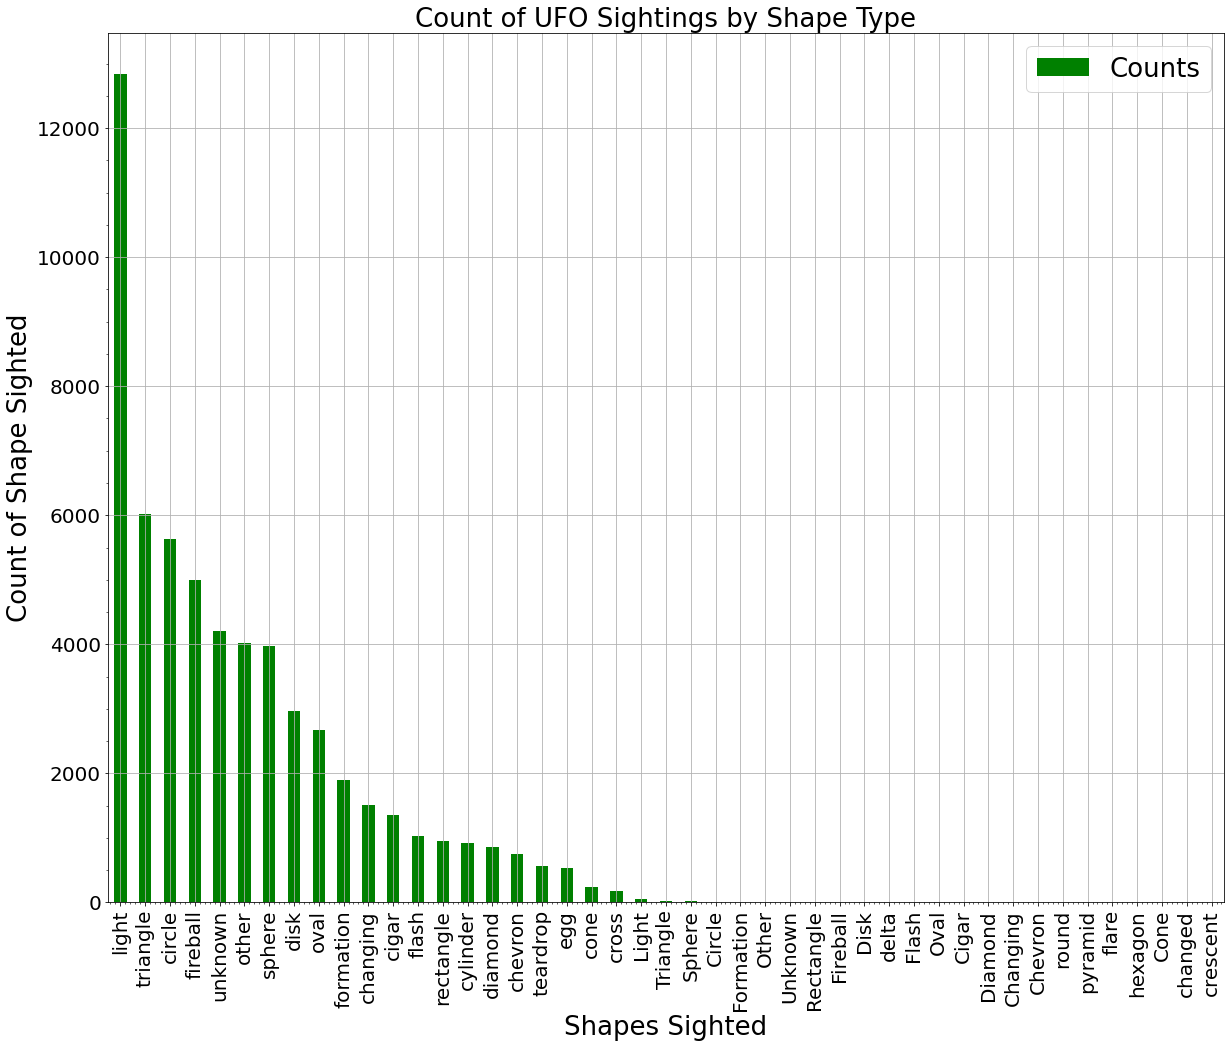

In [54]:
#Image for sigtings by shape 
shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("Shapes Sighted", fontsize=26)
plt.ylabel("Count of Shape Sighted", fontsize=26)
plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26)
x_indexes = np.arange(len(shape_df))
plt.xticks(ticks=x_indexes, labels=shape_df["UFO Shape"])
#plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()

# Shape vs time Bubbles 


In [13]:
#Get columns for Shape And Time
shape_time_df = ufo_usa[["shape","duration (seconds)"]]
shape_time_df

,shape,duration (seconds)
0,light,8.0
1,other,60.0
2,rectangle,120.0
3,light,5.0
4,triangle,3.0
...,...,...
58300,Light,10.0
58301,Light,10.0
58302,Light,240.0
58303,Unknown,1800.0


In [14]:


# Load data, define hover text and bubble size
data = px.data.gapminder()
shape_time_df = data[data['year']==2007]
shape_time_df = shape_time_df.sort_values(['shape','duration (seconds)'])

hover_text = []
bubble_size = []

for index, row in shape_time_df.iterrows():
    hover_text.append(('Shape: {shape}<br>'+
                      'Time: {duration (seconds)}<br>'+
            
    bubble_size.append(math.sqrt(row['pop']))

shape_time_df['text'] = hover_text
shape_time_df['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['disk', 'light', 'triangle', 'circle', 'fireball']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()


SyntaxError: invalid syntax (<ipython-input-14-68c54230d026>, line 15)

In [15]:
Duration = shape_time_df.groupby['duration (seconds)']

TypeError: 'method' object is not subscriptable

In [16]:
shape_time_df= px.data.gapminder()

fig = px.scatter(ufo_usa_clean.query("year==2007"), x="shape", y="duration (seconds)",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

UndefinedVariableError: name 'year' is not defined

# Word Cloud

In [23]:
#get tect from comments for Word Cloud
comments_df = ufo_usa_clean ['comments']
comments_df

0        Light over Peoria&#44 IL that moves slowly&#44...
1                       1 object with green and red lights
2        Giant rectangular craft (resembling an upside-...
3        Round&#44 bright&#44 low flying object silentl...
4        illuminated triangular craft&#44 flying at hig...
                               ...                        
58300    Bright light moving sporadically up and down a...
58301    Bright light moving sporadically up and down a...
58302    Extremely bright mirror like light that left v...
58303    Witnessed object being chased by fighter jets ...
58304    I saw a very bright light in the sky and then ...
Name: comments, Length: 58287, dtype: object

In [24]:
#save as text 
numpy_array = comments_df.to_numpy()
np.savetxt("comments_text.txt", numpy_array, fmt = "%s")

In [26]:
text = ""
with open('comments_text.txt') as f:
    text = ''.join(f.readlines())

In [29]:
#Word Cloud
# Iterating through the .csv data file 
comment_words = []
top_words= []
words = 'comments_text.txt'
separate = i.split()

for i in words: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

comment_words

NameError: name 'i' is not defined

In [30]:
#Create WC
wc = WordCloud()

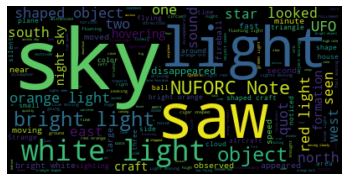

In [37]:
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
#Save to fuile
wc.to_file('alien_words.png')

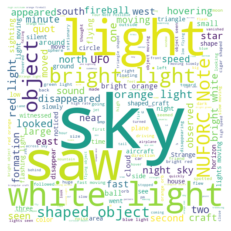

In [39]:
#Custom Mask
custom_mask = np.array(Image.open("alien_mask.png"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

float32
(500, 500, 4)


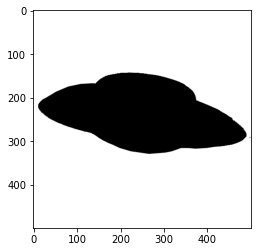

In [40]:
#create custom mask from PNG
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('alien_mask.png')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

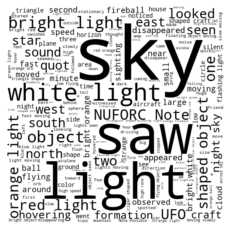

In [41]:
# Custom Black and white
custom_mask = np.array(Image.open("alien_mask.png"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func=image_colors)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('alien_wordsbw.png')

In [36]:
#maps 